In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,239.695455
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,264.064286
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


<AxesSubplot:>

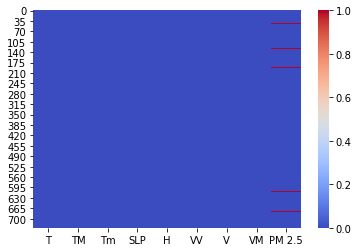

In [10]:
sns.heatmap(df.isnull(),cmap='coolwarm')

<AxesSubplot:>

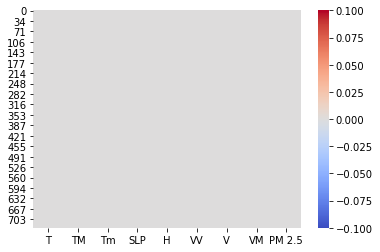

In [11]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(),cmap='coolwarm')

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

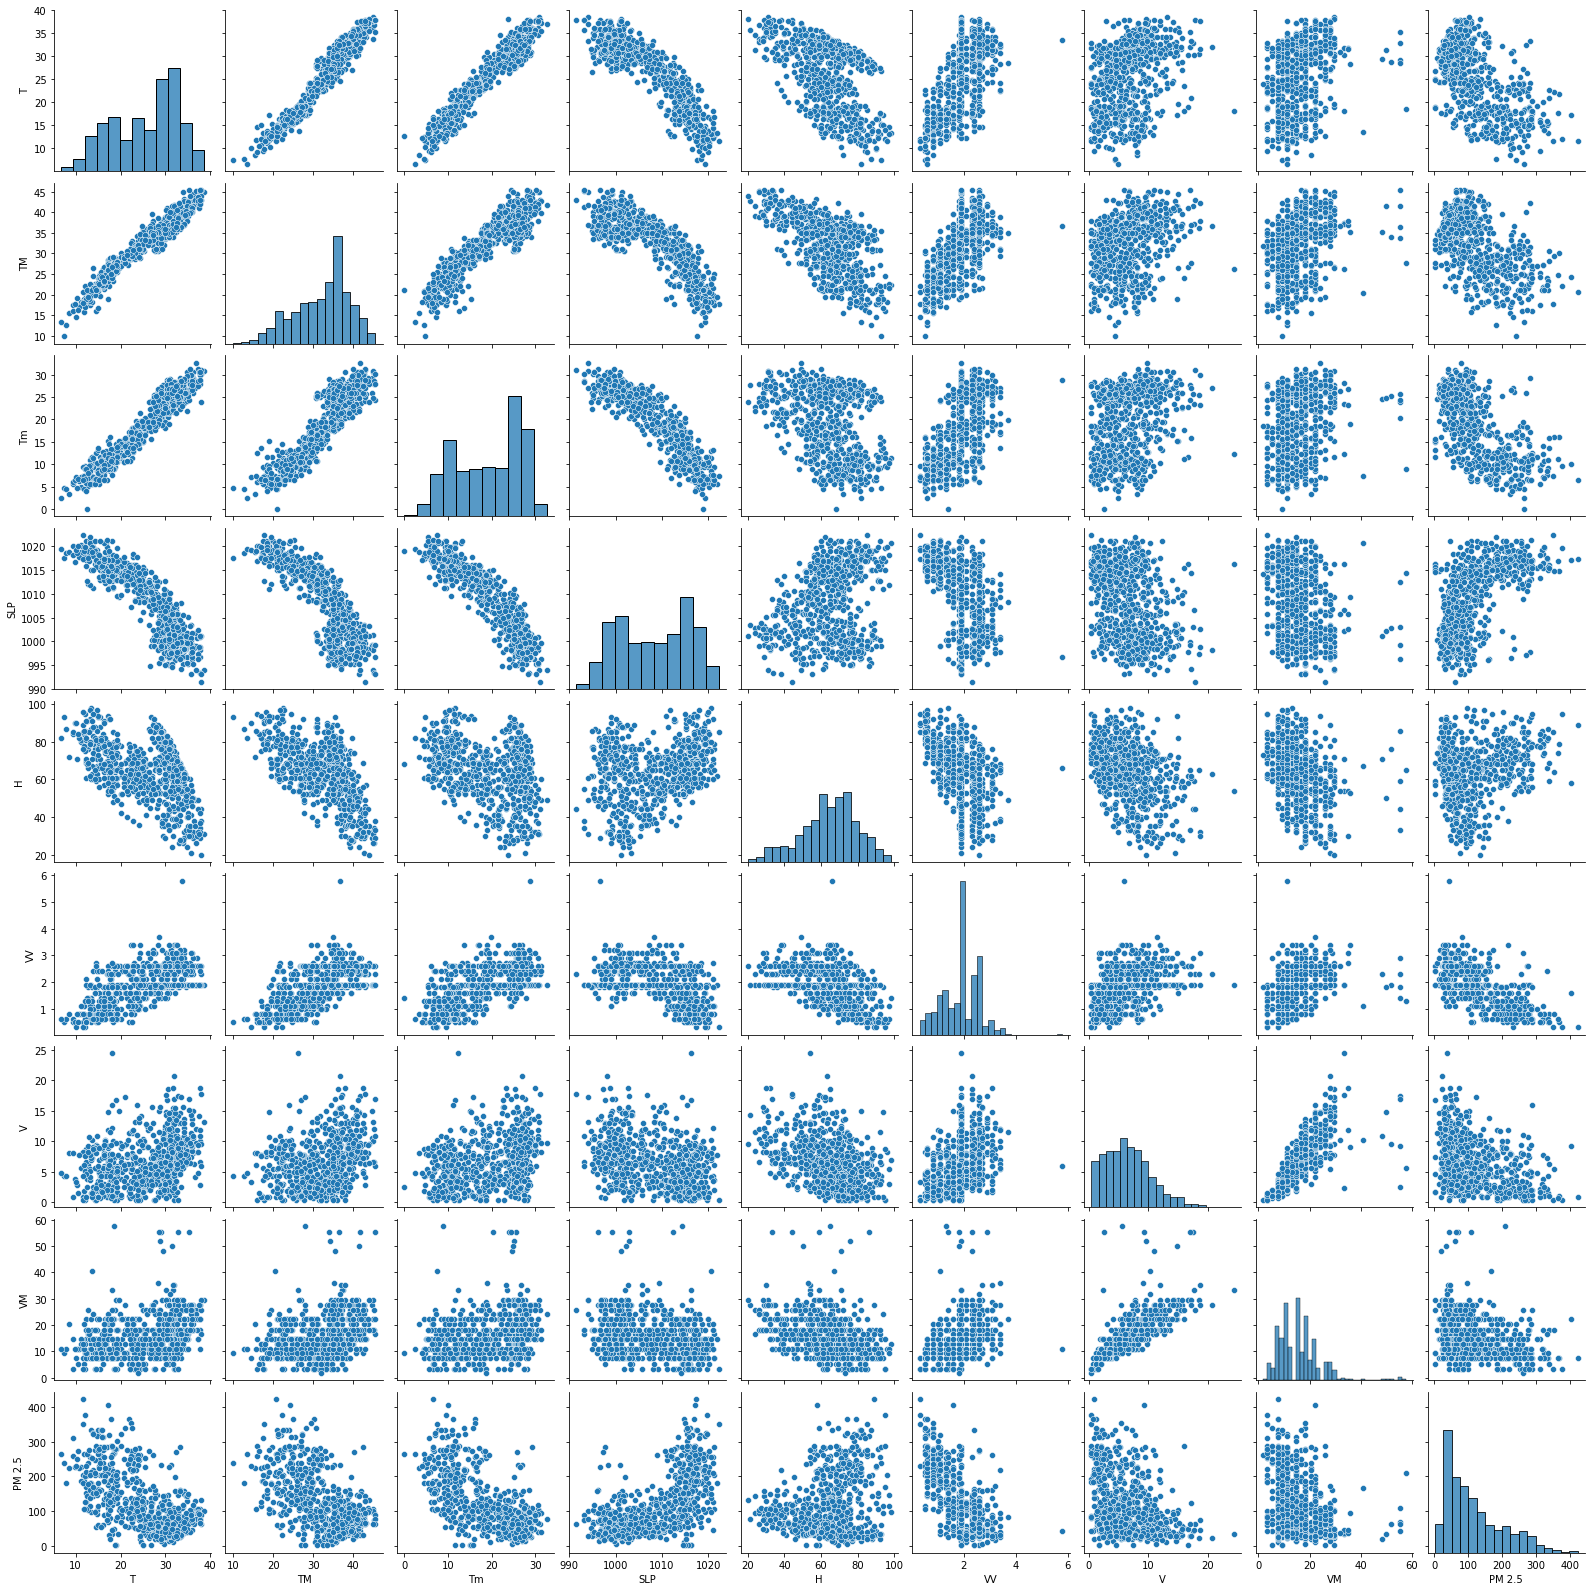

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967195,0.959909,-0.886519,-0.514949,0.617491,0.322482,0.283788,-0.633663
TM,0.967195,1.000000,0.897558,-0.830950,-0.596365,0.594056,0.315421,0.295351,-0.574022
Tm,0.959909,0.897558,1.000000,-0.910802,-0.314261,0.554799,0.307959,0.255611,-0.674587
SLP,-0.886519,-0.830950,-0.910802,1.000000,0.275267,-0.488723,-0.341617,-0.295855,0.624604
H,-0.514949,-0.596365,-0.314261,0.275267,1.000000,-0.475003,-0.404000,-0.371025,0.182111
VV,0.617491,0.594056,0.554799,-0.488723,-0.475003,1.000000,0.400796,0.346087,-0.643748
V,0.322482,0.315421,0.307959,-0.341617,-0.404000,0.400796,1.000000,0.760824,-0.364989
VM,0.283788,0.295351,0.255611,-0.295855,-0.371025,0.346087,0.760824,1.000000,-0.302462
PM 2.5,-0.633663,-0.574022,-0.674587,0.624604,0.182111,-0.643748,-0.364989,-0.302462,1.000000


Clearly it is visible in the above table that H doesn't make that much difference while predicting PM 2.5 value so while feature extraction we can ignore the value of H . but as we have very few number of parameters will we consider all of them.

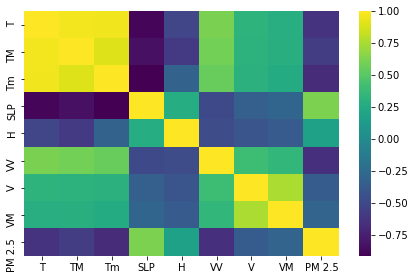

In [29]:
sns.heatmap(df.corr(),cmap = 'viridis')
plt.tight_layout()

In [20]:
df.corr().index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [37]:
model.feature_importances_

array([0.1506714 , 0.0820664 , 0.17802724, 0.12792535, 0.07701558,
       0.29569036, 0.05115876, 0.03744491])

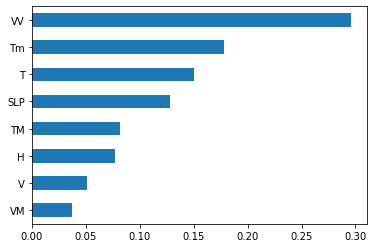

<AxesSubplot:>

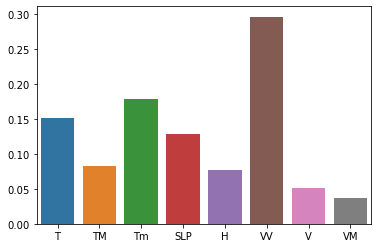

In [68]:
most_important_features = pd.Series(model.feature_importances_,index = X.columns)
most_important_features.sort_values(ascending=True,inplace=True)
most_important_features.plot(kind = 'barh')
plt.show()
sns.barplot(x= X.columns , y = model.feature_importances_)

/home/akanksh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

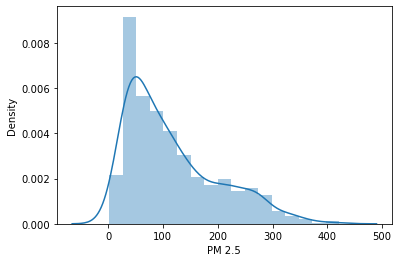

In [71]:
sns.distplot(y)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [75]:
lr_model.score(X_test,y_test)

0.5423644748230535

In [76]:
lr_model.score(X_train,y_train)

0.6266896077241189

In [78]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(lr_model,X,y,cv= 5)

In [80]:
score.mean()

0.4818342437355544

In [81]:
coeff_df = pd.DataFrame(lr_model.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
T,6.272088
TM,-0.275034
Tm,-8.635562
SLP,1.560067
H,-0.663298
VV,-65.774873
V,-1.583024
VM,-0.105510


/home/akanksh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

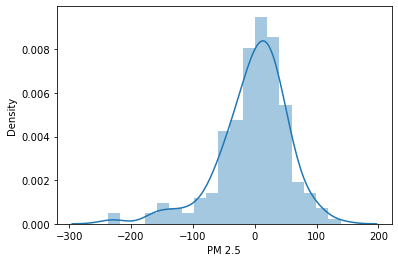

In [83]:
prediction = lr_model.predict(X_test)
sns.distplot(prediction-y_test)

In [84]:
import pickle

In [87]:
file = open('Linear_Regression_model.pkl','wb')
pickle.dump(lr_model,file)